## Exploratory Data Analysis on Company's Stocks Dataset (Beginner)
The dataset is a company's stocks dataset that contains seven records- date, opening value of the stock, closing value of the stock, high and low values of stock that day, the adjacent closing value of the stock, and the volume of stocks that had been traded that day. The dataset consists of 605 records. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("UBER.csv",parse_dates=['Date'])

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       725 non-null    datetime64[ns]
 1   Open       725 non-null    float64       
 2   High       725 non-null    float64       
 3   Low        725 non-null    float64       
 4   Close      725 non-null    float64       
 5   Adj Close  725 non-null    float64       
 6   Volume     725 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 39.8 KB


In [5]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,725.000000,725.000000,725.000000,725.000000,725.000000,7.250000e+02
mean,40.166447,40.961435,39.261123,40.107255,40.107255,2.472855e+07
std,9.198940,9.259164,9.075919,9.141862,9.141862,1.691406e+07
min,15.960000,17.799999,13.710000,14.820000,14.820000,3.380000e+06
25%,32.730000,33.419998,31.983000,32.799999,32.799999,1.423060e+07
50%,39.000000,39.959999,38.009998,38.810001,38.810001,2.079540e+07
75%,46.700001,47.520000,45.860001,46.419998,46.419998,3.011960e+07
max,63.250000,64.050003,60.799999,63.180000,63.180000,1.863225e+08


From the above table, we can get several insights into the dataset. We can know a lot of useful information from the above table such as mean, standard deviation, value counts, and how often a value occurs in the dataset.

### Plotting a heatmap to find the correlation between the different variables in the dataset.

<AxesSubplot:>

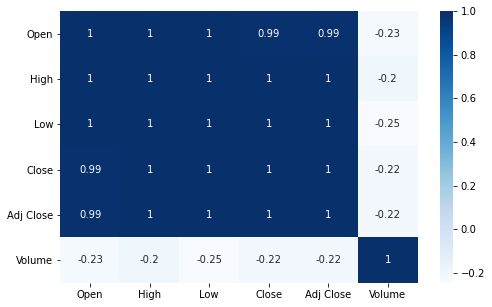

In [6]:
plt.figure(figsize=(8,5))
sns.heatmap(data.corr(), cmap="Blues", annot=True)

There are large number of 1s and values close to 1. This means those variables show high positive correlations and are interrelated. This might be possible because of the comparatively very small difference between those values. However, in-stock market this small value is what makes the difference. So we are going to add new variables to our dataset that represents the difference between those values.

In [7]:
data['open-high'] = data['Open']-data['High']
data['open-low'] = data['Open'] - data['Low']
data['close-high'] = data['Close']-data['High']
data['close-low'] = data['Close'] - data['Low']
data['high-low'] = data['High'] - data['Low']
data['open-close'] = data['Open'] - data['Close']
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,open-high,open-low,close-high,close-low,high-low,open-close
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500,-3.000000,0.939999,-3.430000,0.509999,3.939999,0.430000
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400,-0.450001,2.709999,-2.140004,1.019996,3.160000,1.690003
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100,-1.649998,1.460003,0.000000,3.110001,3.110001,-1.649998
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100,-2.510002,0.419998,-0.590000,2.340000,2.930000,-1.920002
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500,-2.580001,0.230000,-1.060001,1.750000,2.810001,-1.520000


From the previous heatmap, we could realize that those values aren’t very useful. So for more clarity, we will drop those values and take only the new values for creating the heatmap.

In [8]:
data = data.drop(['Open','Close','High','Low'], axis=1)

<AxesSubplot:>

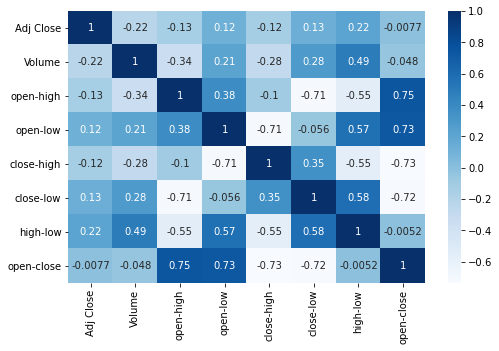

In [9]:
plt.figure(figsize=(8,5))
sns.heatmap(data.corr(),cmap='Blues',annot=True)

The main variable we are going to focus on in this dataset is the ‘Volume’. Variables having a large correlation value with volume represent that those numbers might have intrigued a large number of buyers and sellers. Correlation between those features and the volume feature will tell us how a change in that feature impacts the number of stocks traded that day.

The open-high shows the most negative correlation with the volume feature. This means that the greater the difference between the opening value of the stock and the highest value of stock that day, the greater will be the stocks traded that day. 

<AxesSubplot:xlabel='open-high', ylabel='Volume'>

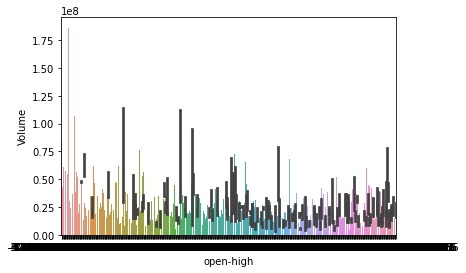

In [10]:
sns.barplot(data=data, x = "open-high", y="Volume")

The ‘high-low’ feature shows the maximum value of correlation with the ‘volume’ feature. Thus we can think that a greater fluctuation in the stock price may be a reason behind more transactions of stocks that day.

<AxesSubplot:xlabel='high-low', ylabel='Volume'>

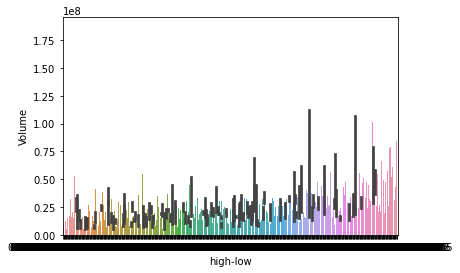

In [11]:
sns.barplot(data=data, x = "high-low", y="Volume")